Column name Abbreviation -  meaning

 Abbreviation    | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used  

In [34]:
import pandas as pd
import numpy as np

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import warnings 
warnings.filterwarnings('ignore')

In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [38]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [39]:
# from catboost import CatBoostClassifier

In [40]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

In [41]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
original = pd.read_csv('ObesityDataSet.csv')

In [42]:
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns


In [43]:
df_train.describe().to_csv('output.csv', index=False)

In [44]:
display('Train:',df_train.head())
display('Test:',df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.44,1.70,81.67,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.00,1.56,57.00,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,2,Female,18.00,1.71,50.17,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.95,1.71,131.27,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.64,1.91,93.80,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.90,1.85,120.64,yes,yes,2.94,3.00,Sometimes,no,2.83,no,0.86,0.00,Sometimes,Public_Transportation
1,20759,Female,21.00,1.60,66.00,yes,yes,2.00,1.00,Sometimes,no,3.00,no,1.00,0.00,Sometimes,Public_Transportation
2,20760,Female,26.00,1.64,111.60,yes,yes,3.00,3.00,Sometimes,no,2.62,no,0.00,0.25,Sometimes,Public_Transportation
3,20761,Male,20.98,1.55,103.67,yes,yes,2.00,2.98,Sometimes,no,2.79,no,0.09,0.00,Sometimes,Public_Transportation
4,20762,Female,26.00,1.63,104.84,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.00,0.74,Sometimes,Public_Transportation


In [45]:
from utils import summary

In [46]:
summary(df_train.drop(columns=["id"])).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,nan,nan
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,nan,nan
Weight,float64,0,0,1979,39.000000,165.057269,87.887768,26.379443,nan,nan
family_history_with_overweight,object,0,0,2,nan,nan,nan,nan,yes,17014
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,nan,nan
NCP,float64,0,0,689,1.000000,4.000000,2.761332,0.705375,nan,nan
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
SMOKE,object,0,0,2,nan,nan,nan,nan,no,20513


# Exploratory Data Analysis

In [47]:
from utils import describeColumn

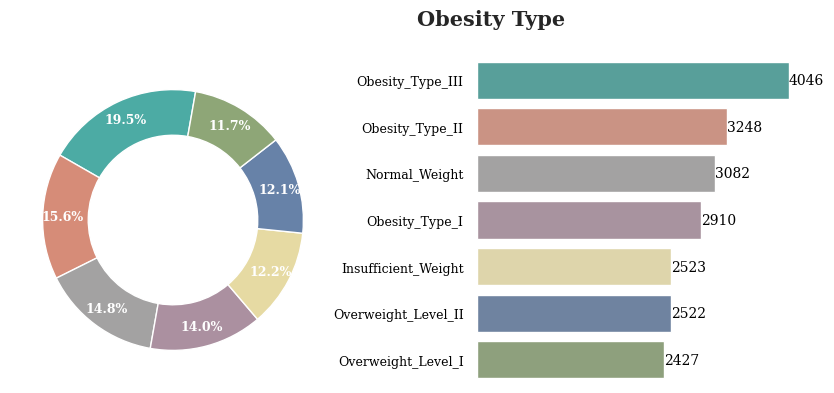

In [48]:
describeColumn('NObeyesdad', df_train, 'Obesity Type')

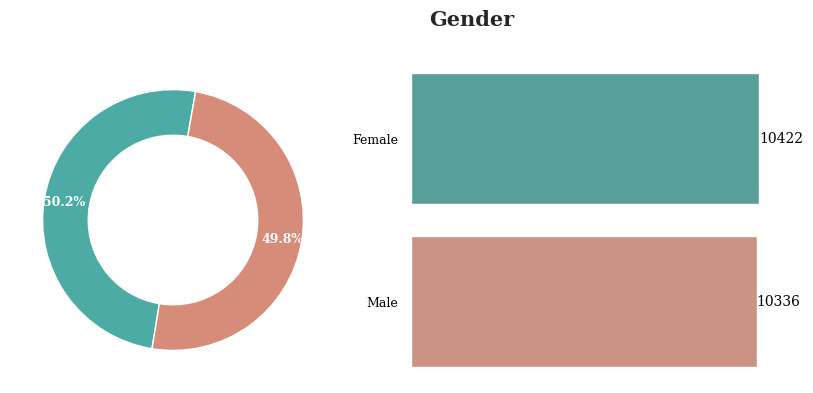

In [49]:
describeColumn('Gender', df_train, 'Gender')

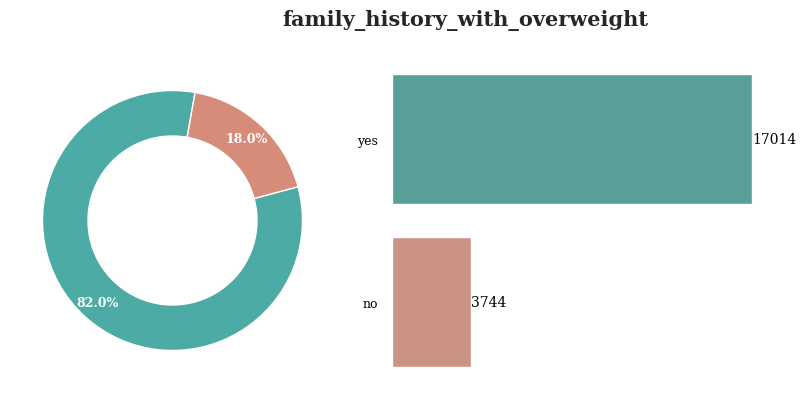

In [50]:
describeColumn("family_history_with_overweight", df_train)

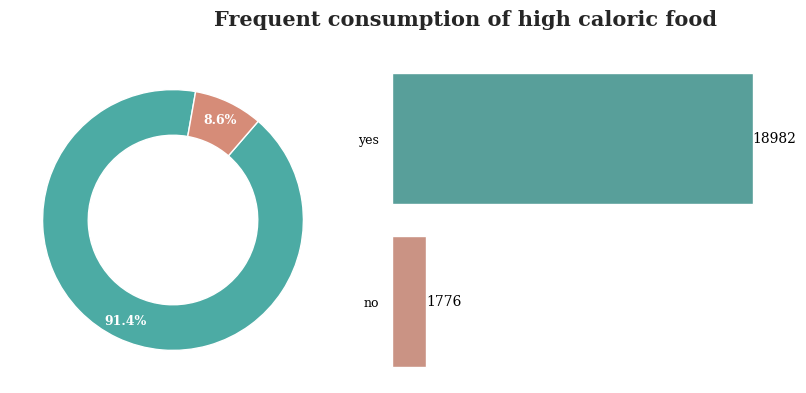

In [51]:
describeColumn("FAVC", df_train, 'Frequent consumption of high caloric food')

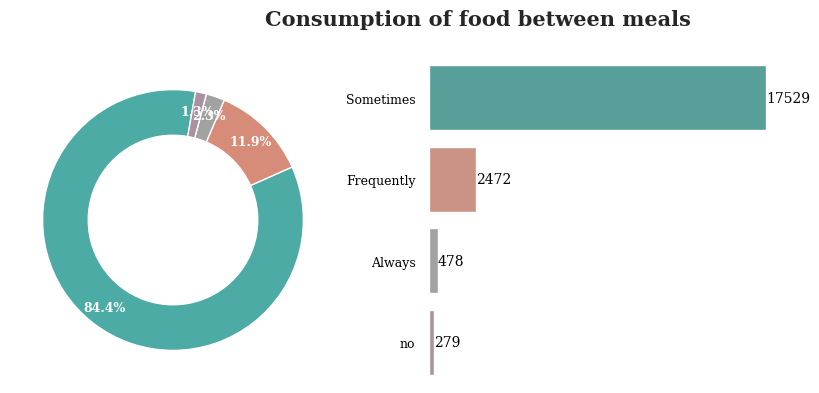

In [52]:
describeColumn("CAEC", df_train, 'Consumption of food between meals')

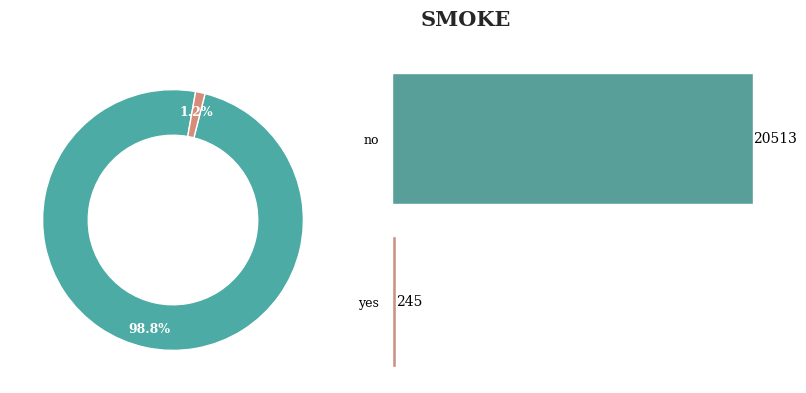

In [53]:
describeColumn("SMOKE", df_train)

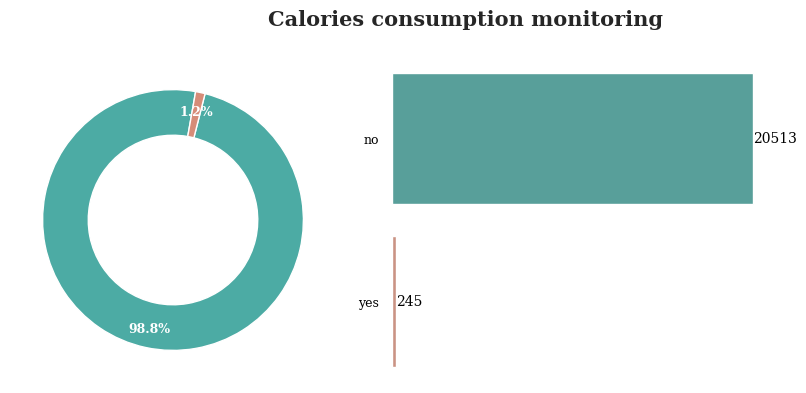

In [54]:
describeColumn("SMOKE", df_train, 'Calories consumption monitoring')

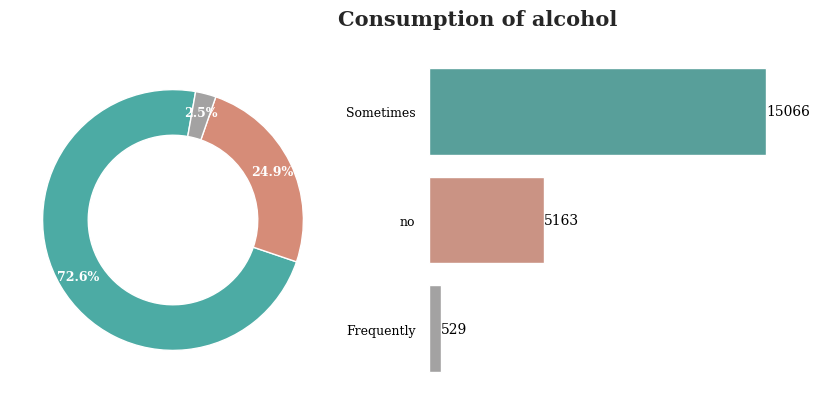

In [55]:
describeColumn("CALC", df_train, 'Consumption of alcohol')

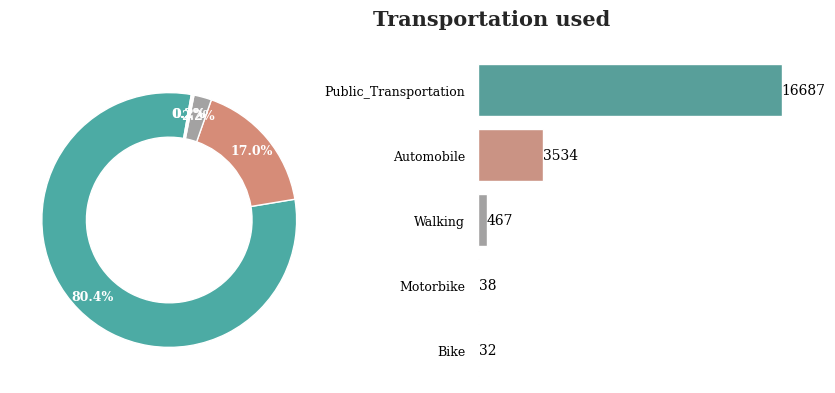

In [56]:
describeColumn("MTRANS", df_train, 'Transportation used')

Distribution against single input

In [57]:
from utils import dist

In [58]:
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)

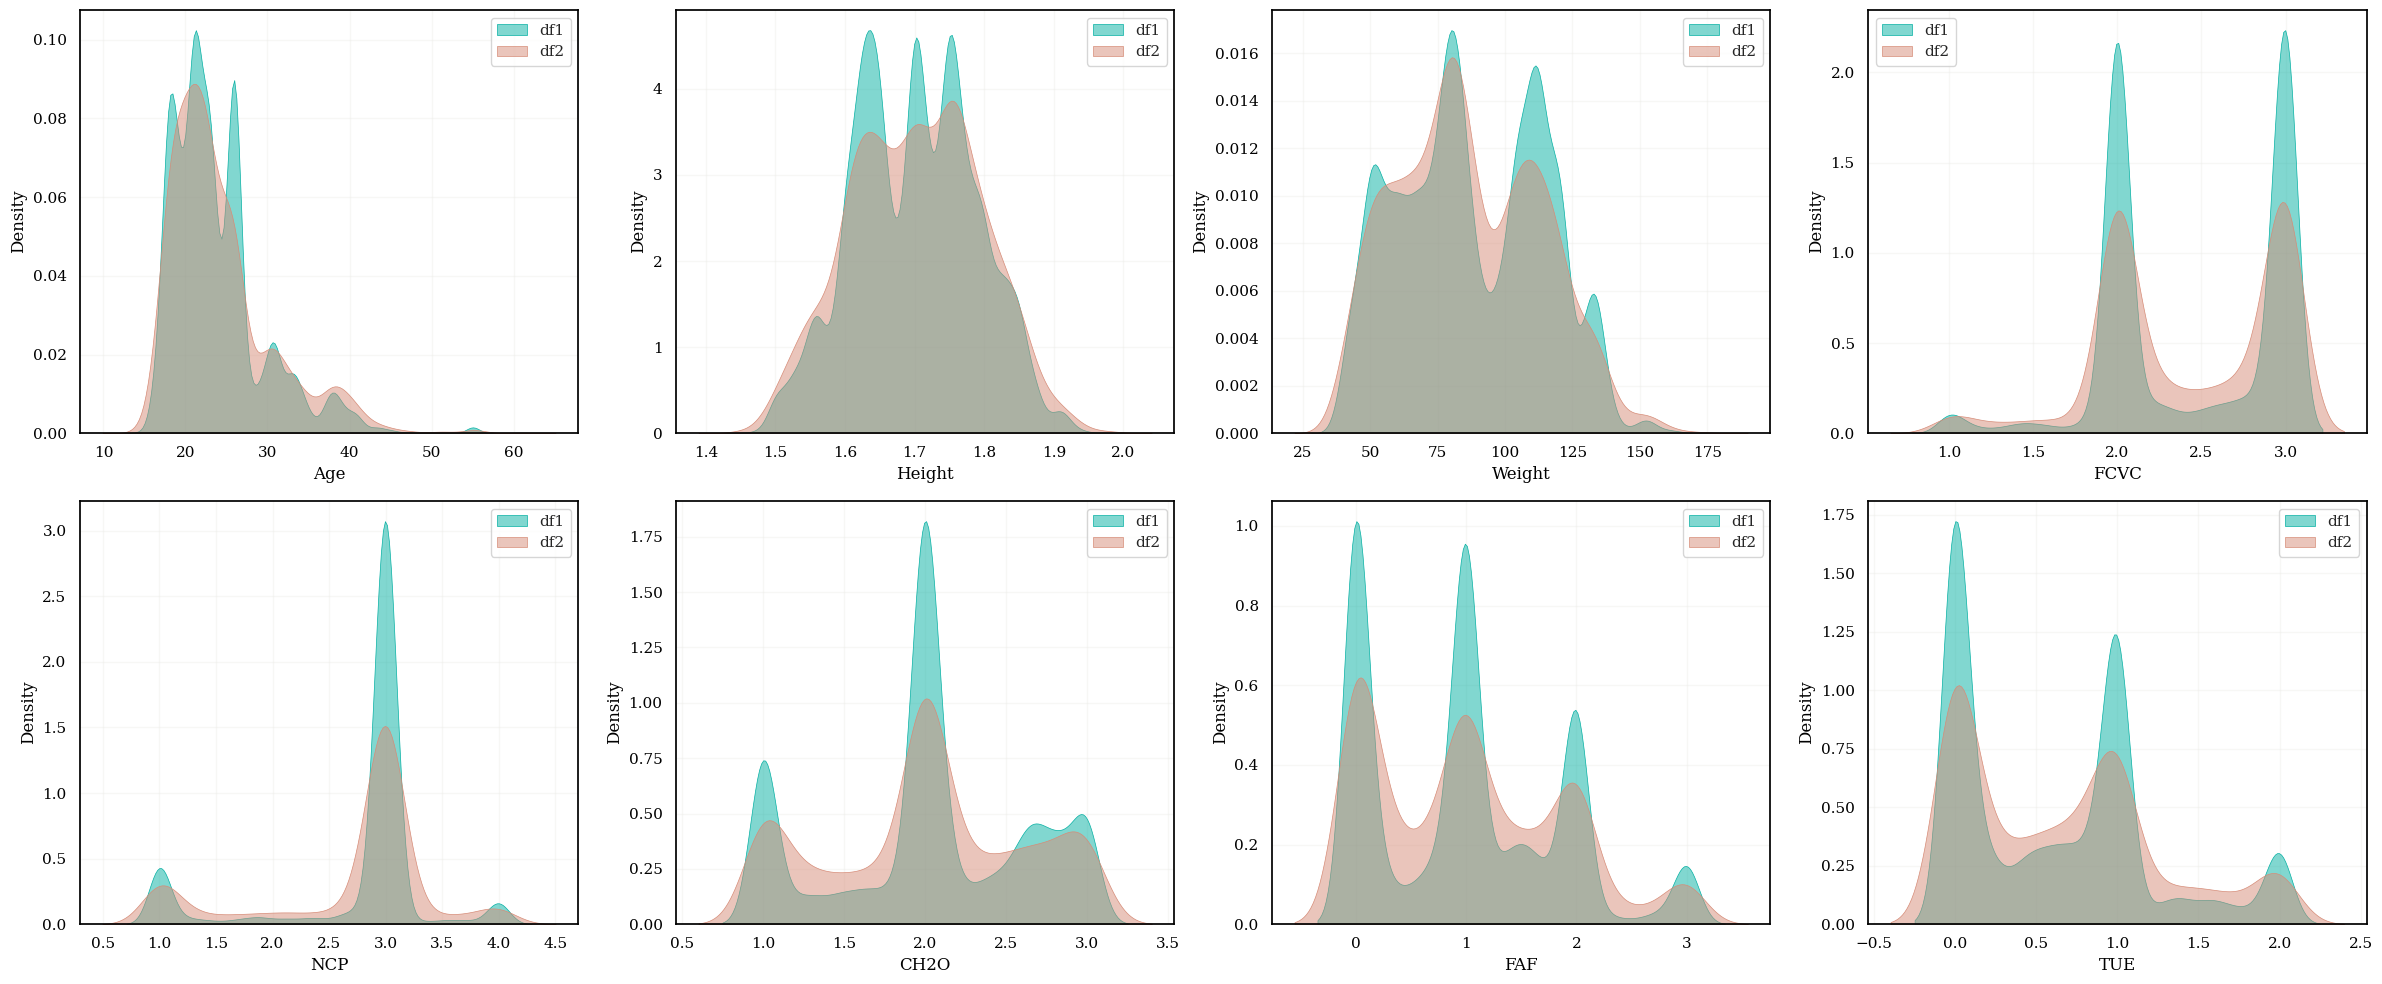

In [59]:
dist(df_train, columns_list=numeric_columns.columns, rows=2, cols=4, df2=original)

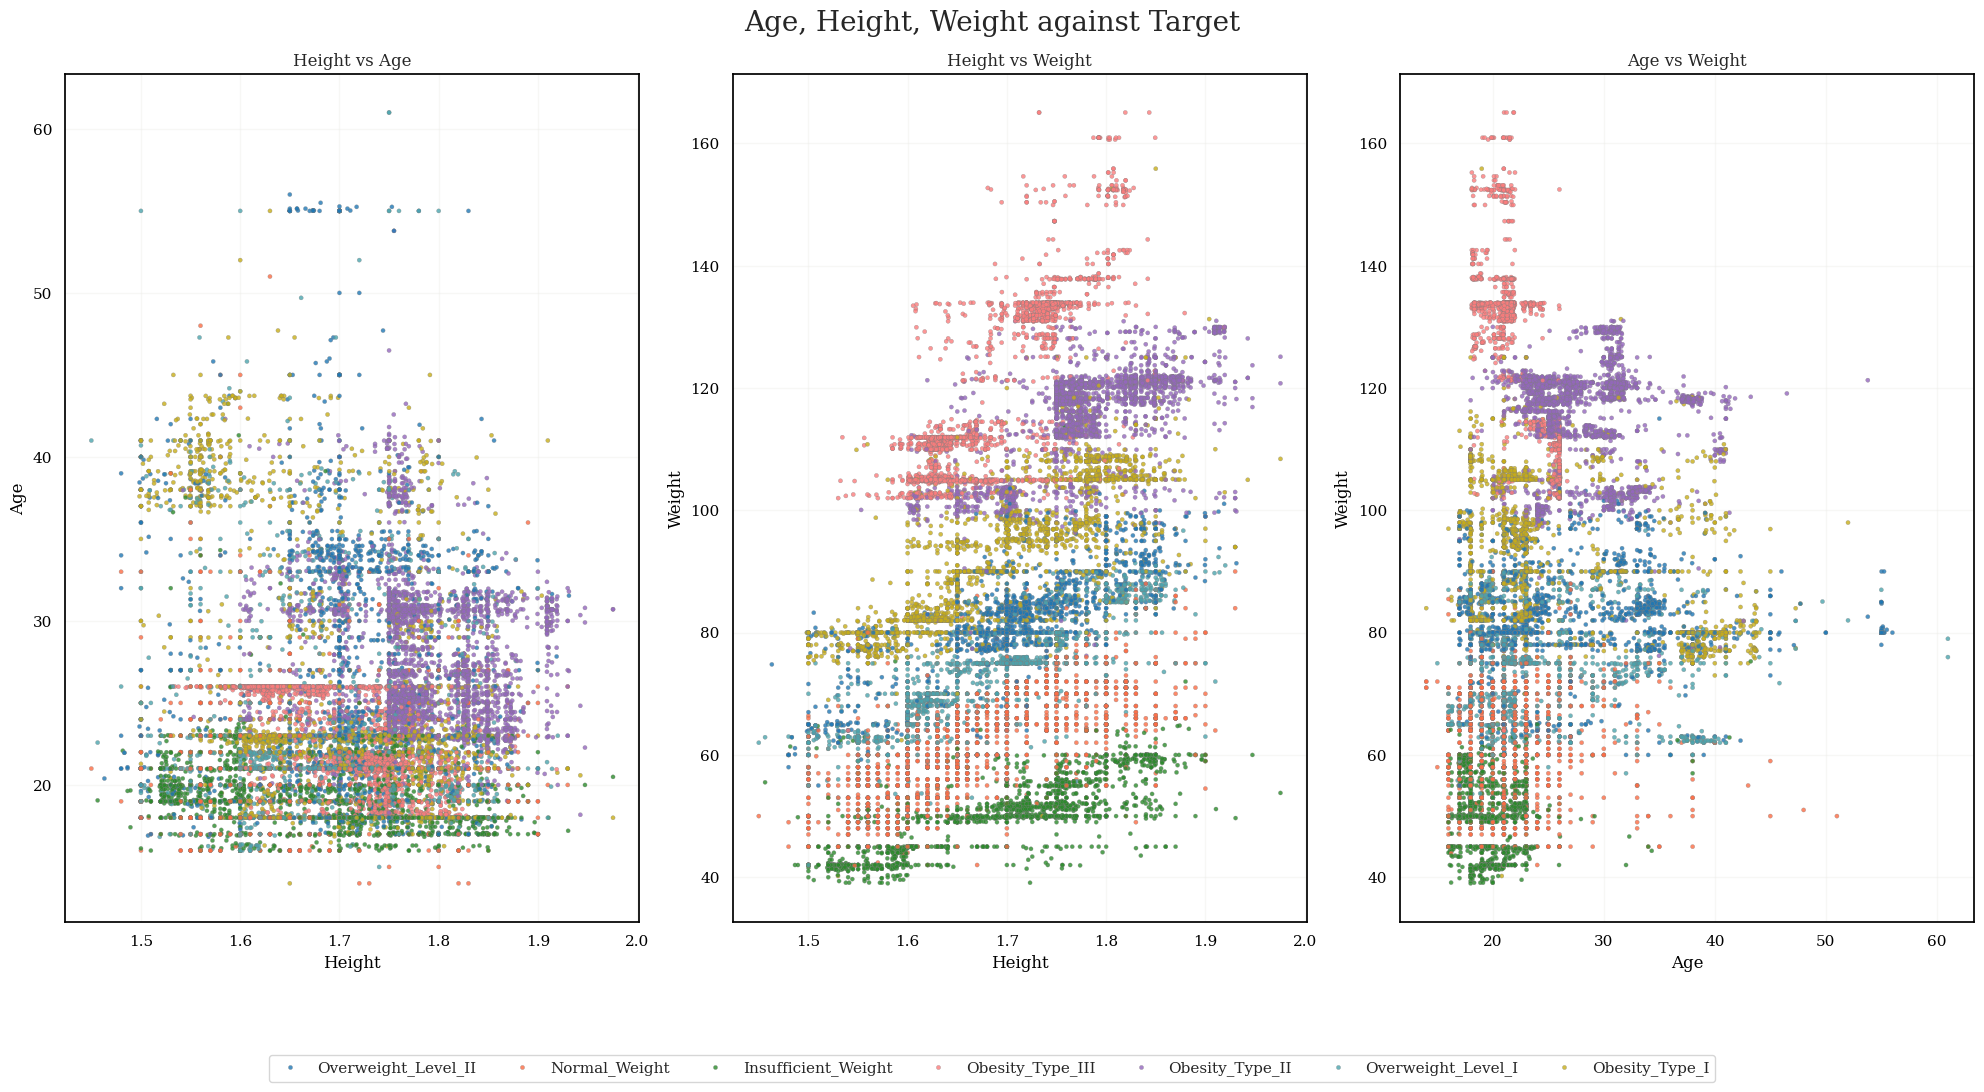

In [60]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax1 = sns.scatterplot(x=df_train['Height'], y=df_train['Age'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[0])
axes[0].set_title('Height vs Age')
ax2 = sns.scatterplot(x=df_train['Height'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[1])
axes[1].set_title('Height vs Weight')
ax3 = sns.scatterplot(x=df_train['Age'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[2])
axes[2].set_title('Age vs Weight')
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_train['NObeyesdad'].unique()),
           title='')
fig.suptitle('Age, Height, Weight against Target', fontsize=20)
fig.subplots_adjust(bottom=0.5, top=0.9, hspace=0.5)
plt.tight_layout()
plt.show()

## BMI

In [61]:
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
df_sort = df_train.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index

In [62]:
df_sort

Index(['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I',
       'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight',
       'Insufficient_Weight'],
      dtype='object', name='NObeyesdad')

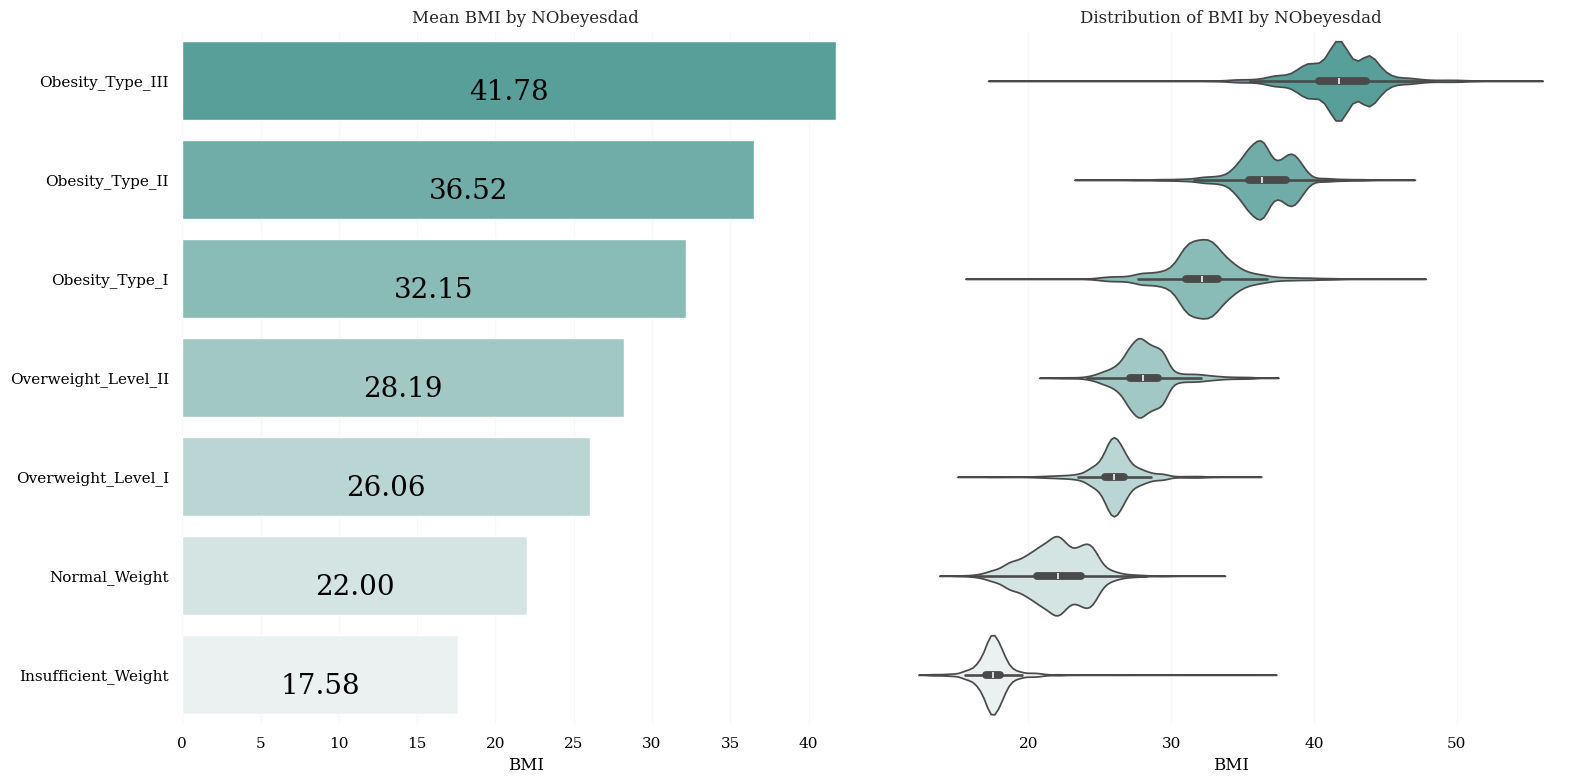

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=20, color='black')
ax1.set_title('Mean BMI by NObeyesdad')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

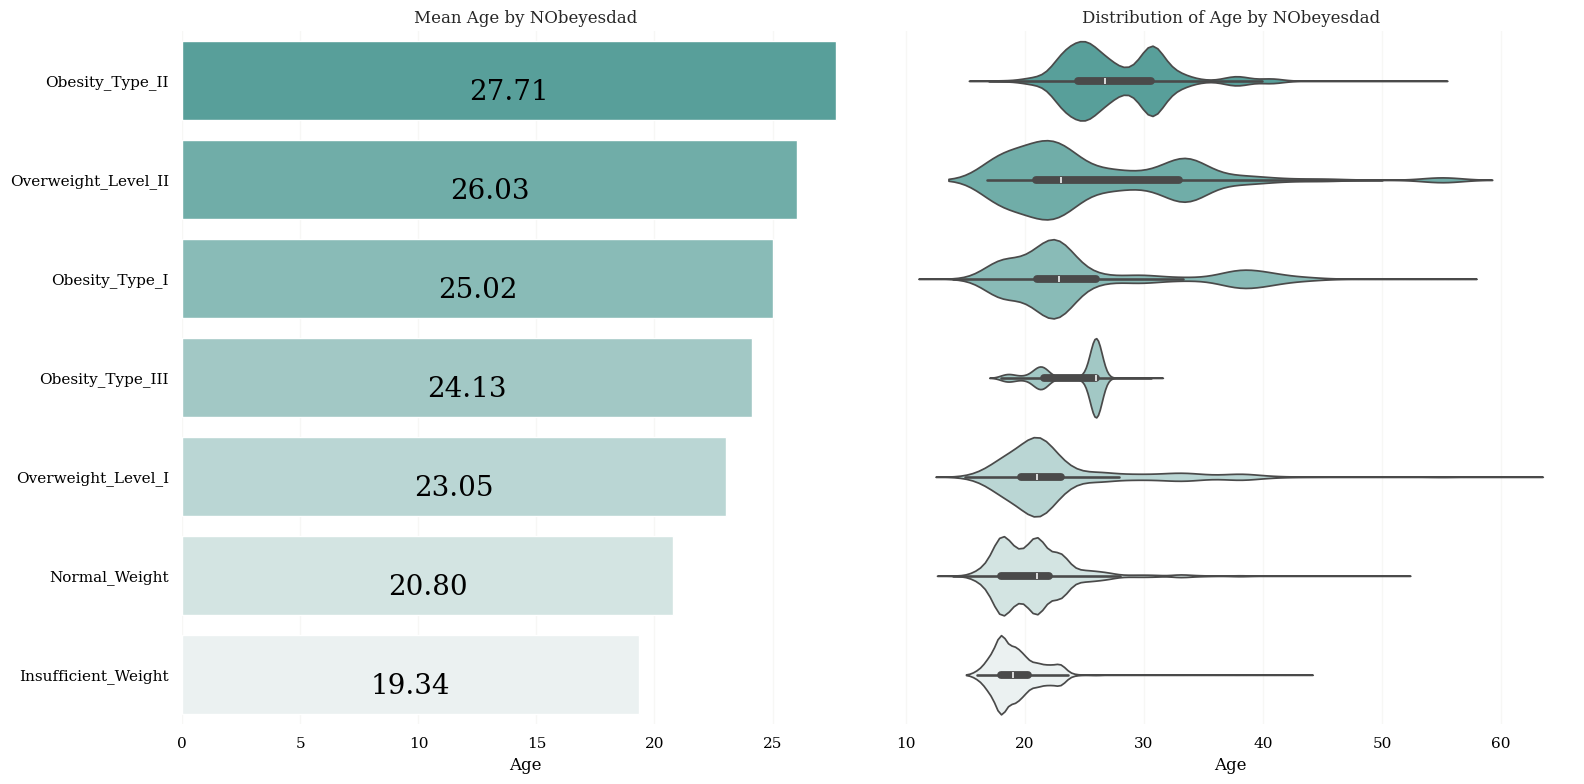

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).index
sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=20, color='black')
ax1.set_title('Mean Age by NObeyesdad')
ax1.set_xlabel('Age')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of Age by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

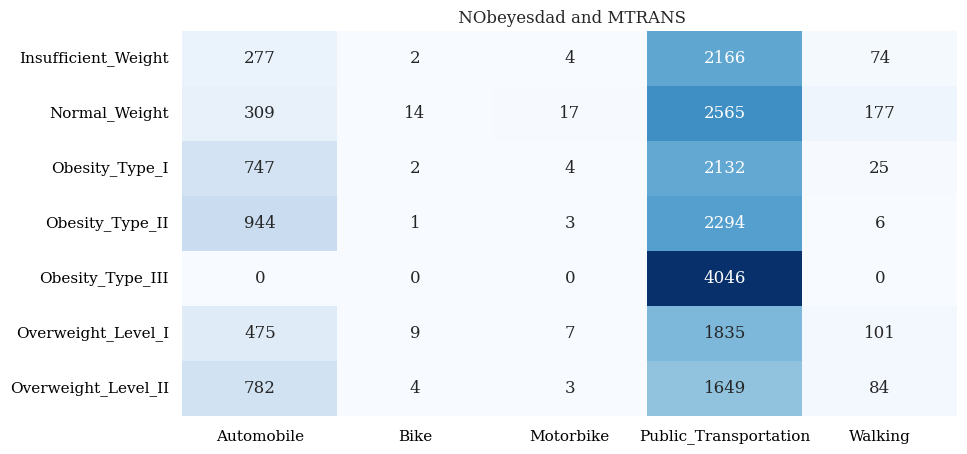

In [65]:
cross_tab = pd.crosstab(df_train['NObeyesdad'], df_train['MTRANS'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(' NObeyesdad and MTRANS')
plt.xlabel('')
plt.ylabel('')
plt.show()

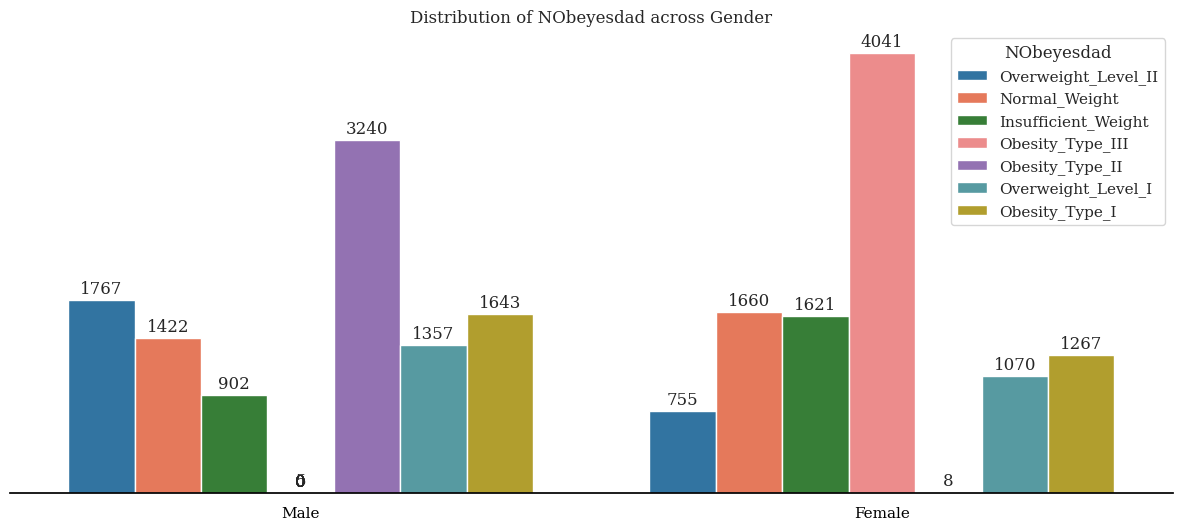

In [66]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=df_train, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

Obesity Type II is most common among Males, while Obesity Type III is most common among Females.

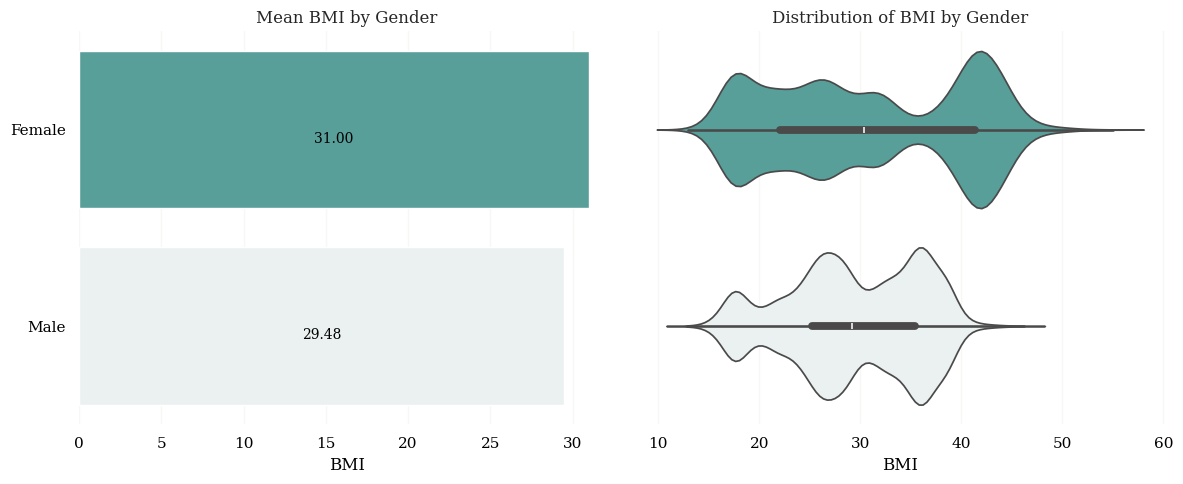

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('Gender')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 50), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by Gender')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)
# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by Gender')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

BMI of female is slighly higher on average than male

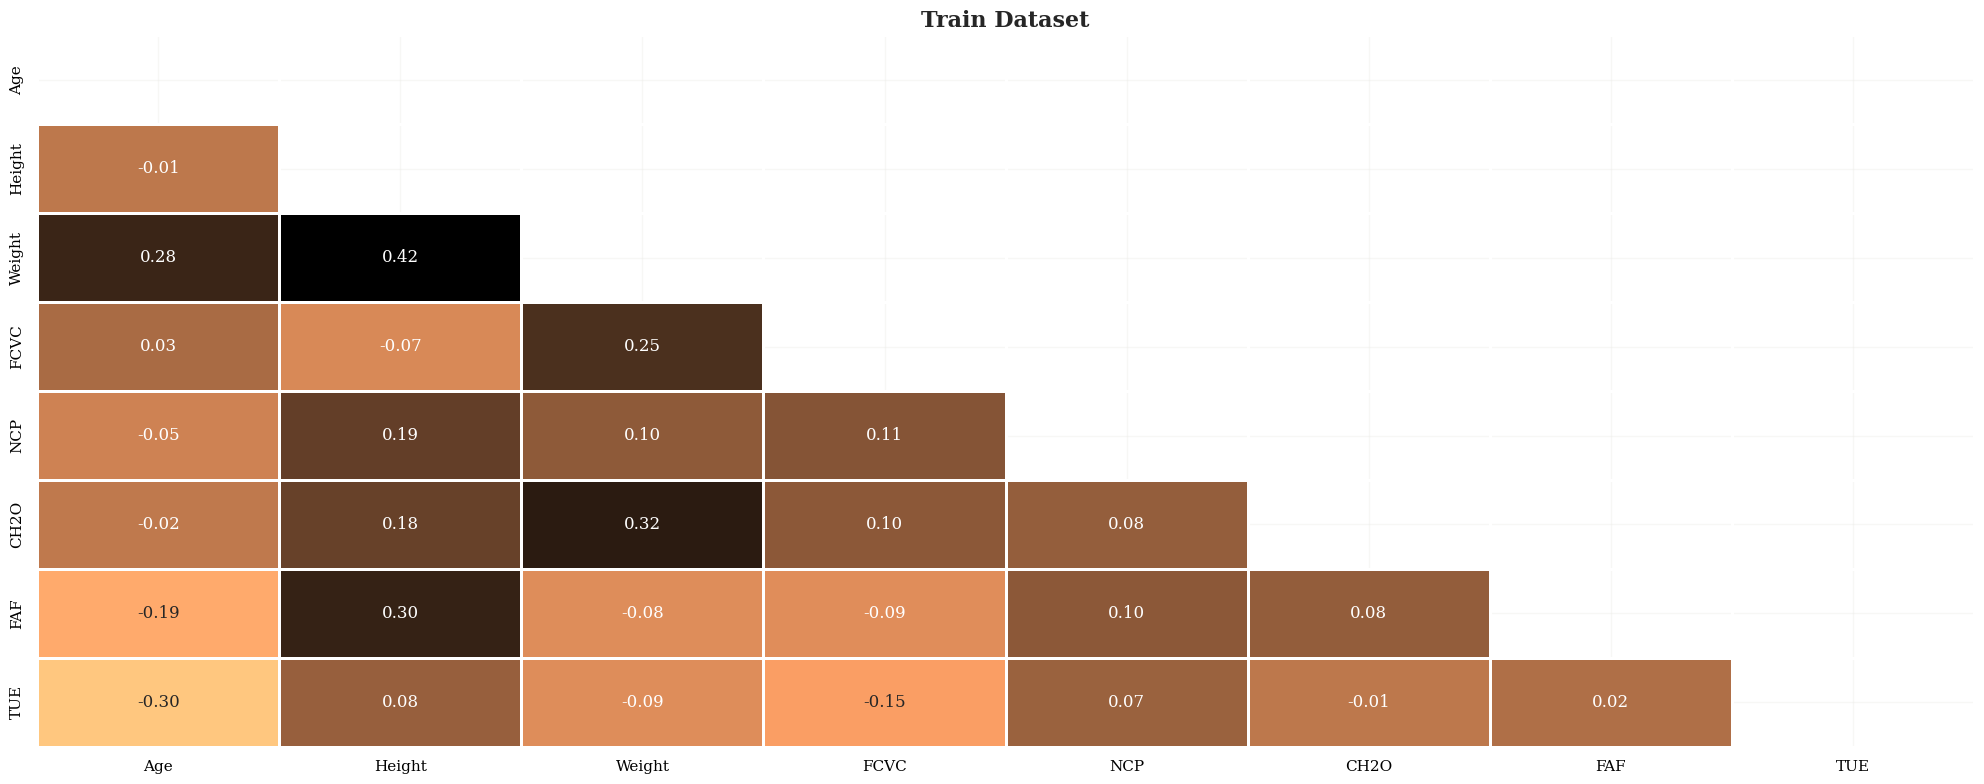

In [68]:
#Correlation heatmap
numeric_columns_train = df_train.select_dtypes(include=np.number).drop(['id','BMI'], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Train
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(corr_train, annot=True, fmt='.2f', mask=mask_train, cmap='copper_r', cbar=None, linewidth=2, ax=ax)
ax.set_title('Train Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Outliers

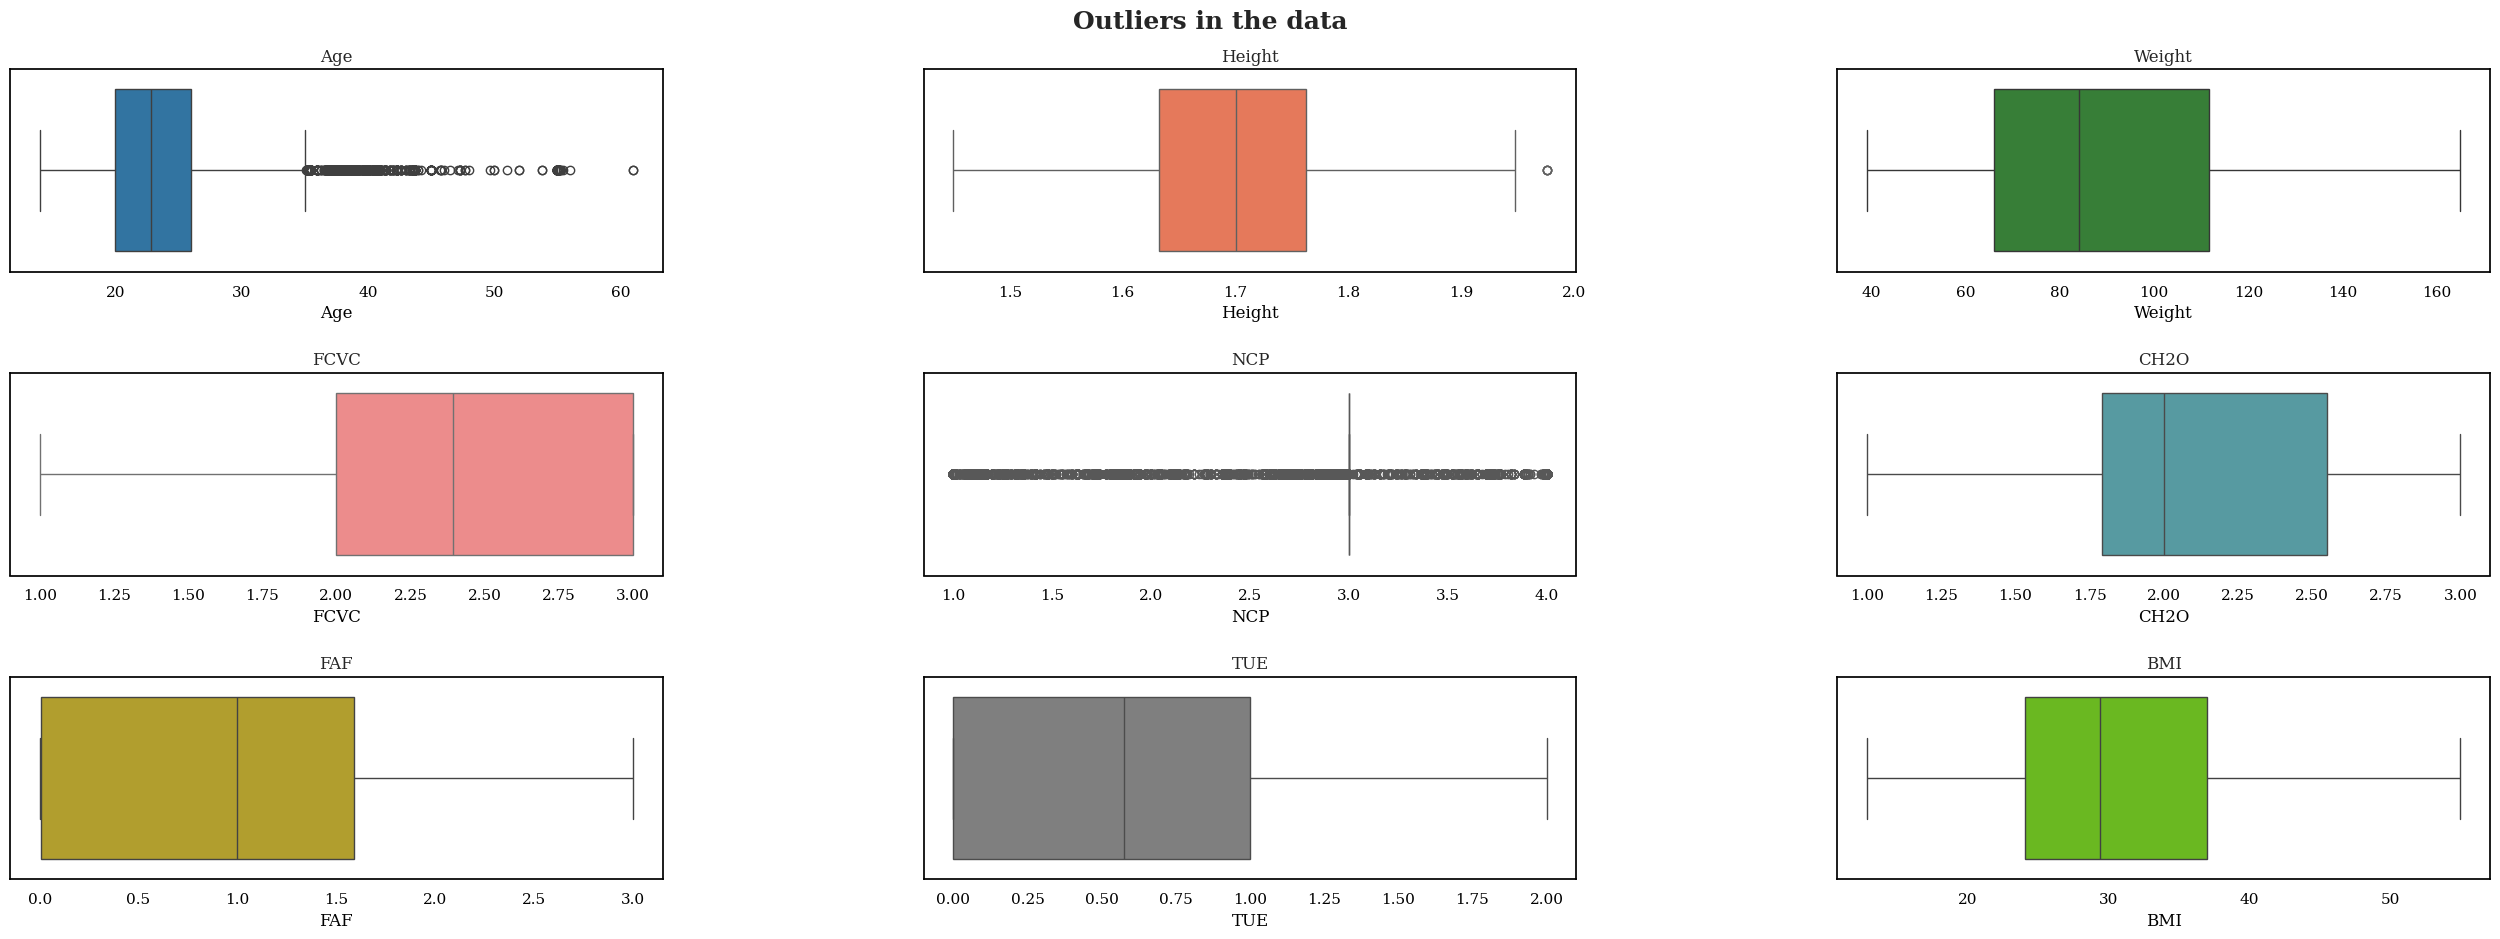

In [69]:
#Check for presence of outliers in each feature
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
fig = plt.figure(figsize=[32,10])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(3,3, i+1);
    ax = sns.boxplot(data = df_train, x=col ,  color= colors[i]);
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()

# Pre-Processing

In [70]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
original = pd.read_csv('ObesityDataSet.csv')

In [71]:
print(df_train.shape)
print(df_test.shape)

(20758, 18)
(13840, 17)


In [72]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(df_train)
categorical_vars.remove('NObeyesdad')

In [73]:
train = pd.concat([df_train, original]).drop(['id'], axis=1)
test = df_test.drop(['id'], axis=1)

In [74]:
train = pd.get_dummies(train, columns=categorical_vars, drop_first=True)
test = pd.get_dummies(test, columns=categorical_vars, drop_first=True)
print(train.shape)
print(test.shape)

(22869, 24)
(13840, 23)


In [75]:
train.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Male', 'family_history_with_overweight_yes',
       'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes',
       'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [76]:
test.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [77]:
#Let's check the Shape of data
print(f'The encoded Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The encoded Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The encoded Train dataset has 22869 rows and 24 columns
The encoded Test dataset has 13840 rows and 23 columns


In [78]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']

In [79]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Models

## LGBMClassifier

### Hyperparameters with Optuna

In [82]:
# # Define the objective function for Optuna optimization
import optuna
from optuna.samplers import TPESampler

In [84]:
def objective(trial, X_train, y_train, X_test, y_test):
     # Define parameters to be optimized for the LGBMClassifier
     param = {
         "objective": "multiclass",
         "metric": "multi_logloss",
         "verbosity": -1,
         "boosting_type": "gbdt",
         "random_state": 42,
         "num_class": 7,
         "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2),
         "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
         "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
         "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
         "max_depth": trial.suggest_int("max_depth", 5, 20),
         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
         "subsample": trial.suggest_float("subsample", 0.8, 1.0),
         "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
     }
     # LGBMClassifier with the suggested parameters
     lgbm_classifier = LGBMClassifier(**param)
    
    # Fit 
     lgbm_classifier.fit(X_train, y_train)

    # Evaluate
     score = lgbm_classifier.score(X_test, y_test, )

     return score


In [87]:
#sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

In [89]:
# Create a study object
study = optuna.create_study(direction="maximize", sampler=sampler)

[I 2024-07-26 20:41:08,614] A new study created in memory with name: no-name-377842c6-b290-4724-b836-de2b816941e0


In [91]:
# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=50)

In [92]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.01197852738297134,  # Learning rate for gradient boosting
    'n_estimators': 509,                # Number of boosting iterations
    'lambda_l1': 0.009715116714365275,  # L1 regularization term
    'lambda_l2': 0.03853395161282091,   # L2 regularization term
    'max_depth': 11,                    # Maximum depth of the trees
    'colsample_bytree': 0.7364306508830604,  # Fraction of features to consider for each tree
    'subsample': 0.9529973839959326,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 17             # Minimum number of data needed in a leaf
}

In [93]:
lgbm_classifier = LGBMClassifier(**best_params)
lgbm_classifier.fit(X_train, y_train)
y_pred = lgbm_classifier.predict(X_test)

In [94]:
accuracy_score(y_test, y_pred) 

0.9064276344556187

In [95]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94       585
      Normal_Weight       0.86      0.90      0.88       667
     Obesity_Type_I       0.91      0.88      0.90       670
    Obesity_Type_II       0.97      0.98      0.97       718
   Obesity_Type_III       1.00      1.00      1.00       845
 Overweight_Level_I       0.78      0.78      0.78       531
Overweight_Level_II       0.82      0.81      0.81       558

           accuracy                           0.91      4574
          macro avg       0.90      0.90      0.90      4574
       weighted avg       0.91      0.91      0.91      4574



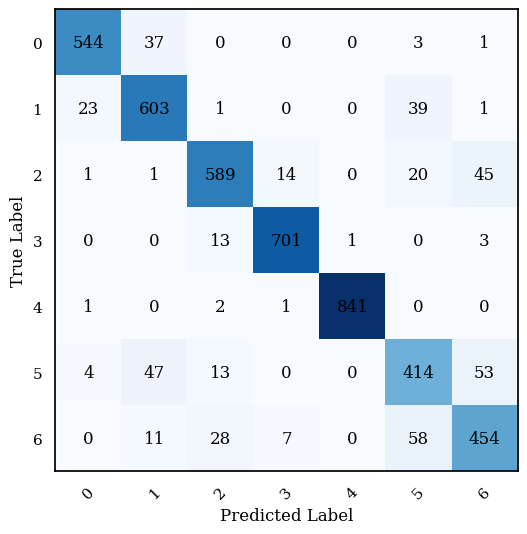

In [96]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

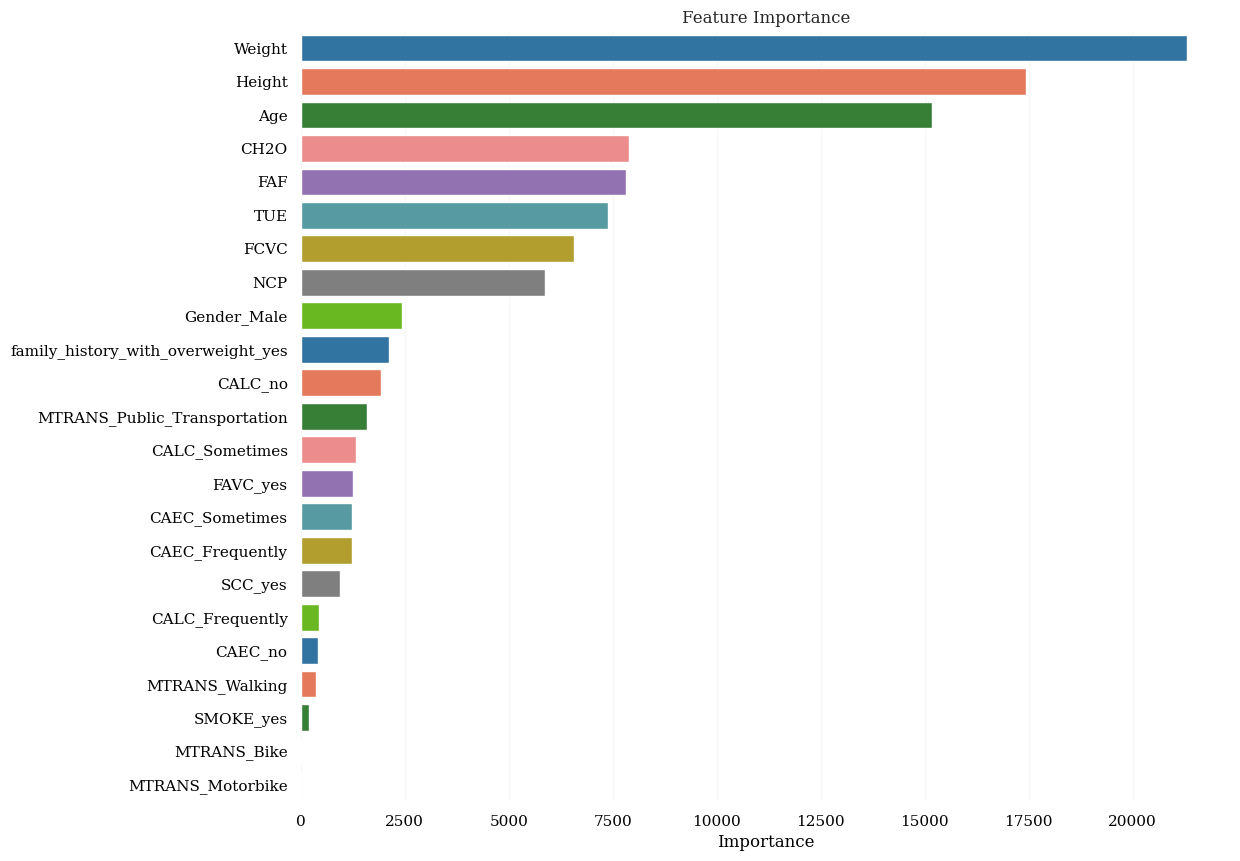

In [98]:
# feature importances
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()